In [ ]:
!nvidia-smi


Mon Mar 31 15:11:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
pip install opencv-python numpy


In [ ]:
!pip install ultralytics opencv-python



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!pip install labelImg



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 15.4 MB/s eta 0:00:00
  Created wheel for labelImg: filename=labelImg-1.8.6-py2.py3-none-any.whl size=261521 sha256=4acf0b7fcc2b541bb115a912e9c42888e7c7d1b47dcc2f4a88ec94ab1bd2ddbe
  Stored in directory: /root/.cache/pip/wheels/79/90/db/e0700438d3647c0209061d77992c901d3c786a56fec574ac86
Successfully built labelImg


In [ ]:
import os
print(os.listdir())  # Should list 'bulk_dataset.zip'


['.config', 'processed_images', 'sample_data']


In [ ]:
from google.colab import files
uploaded = files.upload()  # Select bulk_dataset.zip


KeyboardInterrupt: 

In [1]:
!pip install ultralytics
from IPython.display import clear_output
clear_output()
print("✅ YOLOv8 installed")


✅ YOLOv8 installed


In [2]:
from google.colab import files
uploaded = files.upload()


Saving type_1.zip to type_1.zip


In [3]:
import zipfile

with zipfile.ZipFile("type_1.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

print("✅ Dataset extracted to /content/type_1")


✅ Dataset extracted to /content/type_1


In [4]:
!ls /content/type_1


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [6]:
yaml_content = """
train: /content/type_1/train/images
val: /content/type_1/valid/images
test: /content/type_1/test/images

nc: 2
names: ['type_1', 'type_2']
"""

with open('/content/type_1/data.yaml', 'w') as f:
    f.write(yaml_content)


In [7]:
model.train(data="/content/type_1/data.yaml", epochs=30, imgsz=640, batch=16)


Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/type_1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 49.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 262MB/s]


AMP: checks passed ✅


train: Scanning /content/type_1/train/labels... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<00:00, 1148.48it/s]

train: WARNING ⚠️ /content/type_1/train/images/20250326_210939_jpg.rf.ed4bf8703e7cf93f776c56f325dd89a1.jpg: 1 duplicate labels removed
train: New cache created: /content/type_1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/type_1/valid/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 721.26it/s]

val: WARNING ⚠️ /content/type_1/valid/images/20250326_210939_jpg.rf.ed4bf8703e7cf93f776c56f325dd89a1.jpg: 1 duplicate labels removed
val: New cache created: /content/type_1/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.75G      1.519      3.109      1.237       1427        640: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        100      18777      0.256      0.387      0.331      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.77G      1.358      1.773      1.054        843        640: 100%|██████████| 32/32 [00:10<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        100      18777      0.838      0.384      0.378      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.34G      1.294      1.376      1.033        962        640: 100%|██████████| 32/32 [00:10<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        100      18777      0.302      0.617      0.393      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.36G      1.212      1.199      1.006       1198        640: 100%|██████████| 32/32 [00:10<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        100      18777      0.857      0.398      0.386      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      8.38G      1.148      1.059      0.996        937        640: 100%|██████████| 32/32 [00:10<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        100      18777      0.873      0.385      0.403      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      8.39G      1.095     0.9791     0.9789       1295        640: 100%|██████████| 32/32 [00:10<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        100      18777      0.855      0.402      0.391      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      8.41G      1.048       0.91     0.9733        985        640: 100%|██████████| 32/32 [00:10<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        100      18777       0.87        0.4      0.404      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      8.43G      1.068     0.8845      0.978        734        640: 100%|██████████| 32/32 [00:10<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        100      18777      0.879      0.391       0.41      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      8.44G      1.036     0.8477     0.9694        920        640: 100%|██████████| 32/32 [00:10<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        100      18777      0.866      0.408       0.41      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      8.46G      1.016     0.8284     0.9671        540        640: 100%|██████████| 32/32 [00:10<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        100      18777      0.868      0.408      0.407      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      8.48G       1.01     0.8296     0.9622       1246        640: 100%|██████████| 32/32 [00:09<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        100      18777      0.868      0.412      0.406      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       8.5G      1.008     0.7985     0.9632       1020        640: 100%|██████████| 32/32 [00:09<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        100      18777      0.882      0.403      0.417      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      8.51G     0.9784      0.794     0.9577        734        640: 100%|██████████| 32/32 [00:09<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        100      18777      0.886       0.41      0.421      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      8.53G     0.9837      0.764     0.9537        876        640: 100%|██████████| 32/32 [00:09<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        100      18777      0.891      0.406      0.426      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      8.55G     0.9454     0.7411     0.9437        989        640: 100%|██████████| 32/32 [00:09<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        100      18777      0.895      0.407      0.435      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      8.56G     0.9643     0.7713     0.9521        766        640: 100%|██████████| 32/32 [00:09<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        100      18777      0.894      0.408      0.426      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      8.58G     0.9564     0.7386     0.9482       1096        640: 100%|██████████| 32/32 [00:10<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        100      18777      0.892      0.412      0.428      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       8.6G     0.9404     0.7431     0.9439        840        640: 100%|██████████| 32/32 [00:09<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        100      18777      0.906      0.406      0.434      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      8.62G     0.9345     0.7157     0.9438        885        640: 100%|██████████| 32/32 [00:10<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        100      18777      0.903      0.405      0.433      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      8.63G     0.9329     0.7019     0.9403       1168        640: 100%|██████████| 32/32 [00:10<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        100      18777      0.901      0.405      0.432      0.351


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      8.65G     0.9142     0.7752     0.9388        656        640: 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        100      18777      0.395      0.408      0.432      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      8.67G     0.8948     0.7387     0.9345        614        640: 100%|██████████| 32/32 [00:09<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        100      18777      0.395      0.409      0.431      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      8.68G     0.8855     0.7287     0.9348        606        640: 100%|██████████| 32/32 [00:08<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        100      18777      0.891       0.41       0.43      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30       8.7G      0.884     0.7296     0.9275        755        640: 100%|██████████| 32/32 [00:08<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        100      18777      0.909      0.409      0.437      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      8.72G     0.8707     0.7166     0.9264        647        640: 100%|██████████| 32/32 [00:08<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        100      18777      0.912      0.407      0.438      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      8.73G     0.8544     0.6964     0.9241        658        640: 100%|██████████| 32/32 [00:08<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all        100      18777       0.91      0.409      0.438      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      8.75G     0.8493     0.6927     0.9229        470        640: 100%|██████████| 32/32 [00:08<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        100      18777      0.912       0.41       0.44      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.77G     0.8625     0.6878     0.9216        729        640: 100%|██████████| 32/32 [00:08<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        100      18777      0.915      0.408      0.441      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      8.79G     0.8369     0.6826     0.9184        650        640: 100%|██████████| 32/32 [00:08<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        100      18777      0.915      0.408      0.441      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       8.8G     0.8501     0.6861     0.9244        520        640: 100%|██████████| 32/32 [00:09<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100      18777      0.917      0.408      0.441      0.366



30 epochs completed in 0.103 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:17<00:00,  4.38s/it]


                   all        100      18777      0.917      0.408      0.441      0.366
                type_1         99      18599      0.834      0.815      0.882      0.732
                type_2          1        178          1          0          0          0
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 11.4ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79e43a98c950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [10]:
import os
os.listdir('/content/runs/detect/train/')


['weights', 'args.yaml']

In [12]:
from google.colab import files
uploaded = files.upload()

Saving type_2.zip to type_2.zip


In [13]:
import zipfile

with zipfile.ZipFile("type_2.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

print("✅ Dataset extracted to /content/type_2")

✅ Dataset extracted to /content/type_2


In [14]:
yaml_content = """
path: /content/type_2
train: train/images
val: valid/images
test: test/images

nc: 2
names: ['type_2_class_1', 'type_2_class_2']
"""

with open("/content/type_2_data.yaml", "w") as f:
    f.write(yaml_content)

print("✅ type_2_data.yaml created!")


✅ type_2_data.yaml created!


In [15]:
from ultralytics import YOLO

# Load a YOLOv8 model (you can choose yolov8n.pt, yolov8s.pt, yolov8m.pt, etc.)
model = YOLO("yolov8n.pt")

# Train the model
model.train(data="/content/type_2_data.yaml", epochs=30, imgsz=640, batch=16)


Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/type_2_data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

train: Scanning /content/type_2/train/labels... 503 images, 2 backgrounds, 0 corrupt: 100%|██████████| 503/503 [00:00<00:00, 760.30it/s]

train: WARNING ⚠️ /content/type_2/train/images/20250331_184114_jpg.rf.44c1de96e59b05f1ef28b28bb42f91d7.jpg: 178 duplicate labels removed
train: WARNING ⚠️ /content/type_2/train/images/20250331_193736_jpg.rf.520785479cf5b7a66c06c8187d9f1bf6.jpg: 833 duplicate labels removed


train: New cache created: /content/type_2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/type_2/valid/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 294.48it/s]

val: New cache created: /content/type_2/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      8.32G      1.526      3.094      1.221       2040        640: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        100      17064      0.479      0.791      0.604      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       9.8G      1.358      1.703      1.021       1140        640: 100%|██████████| 32/32 [00:10<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        100      17064      0.627      0.741      0.711      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      11.4G      1.276      1.316          1       1708        640: 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        100      17064      0.687      0.821      0.753       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      11.4G      1.184       1.12     0.9899       1424        640: 100%|██████████| 32/32 [00:10<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        100      17064      0.704      0.834      0.785       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      11.4G      1.101     0.9873     0.9727       1329        640: 100%|██████████| 32/32 [00:10<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        100      17064      0.783        0.8      0.856      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      11.4G      1.084     0.9179     0.9682       1223        640: 100%|██████████| 32/32 [00:10<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        100      17064        0.7      0.835      0.803      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      11.4G      1.074     0.8821     0.9682       1263        640: 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        100      17064      0.727      0.853      0.797      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      11.4G      1.022       0.83      0.947       1252        640: 100%|██████████| 32/32 [00:10<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        100      17064      0.788      0.827      0.873      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      11.4G      1.023      0.831     0.9452       2242        640: 100%|██████████| 32/32 [00:11<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        100      17064      0.793      0.845      0.884      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      11.4G     0.9776      0.782     0.9387       1965        640: 100%|██████████| 32/32 [00:10<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        100      17064      0.782      0.846      0.876      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      11.4G     0.9637     0.7635     0.9356       1643        640: 100%|██████████| 32/32 [00:10<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        100      17064      0.765      0.841      0.868      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      11.4G     0.9576       0.76     0.9377       1433        640: 100%|██████████| 32/32 [00:10<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        100      17064      0.777      0.847      0.869      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      11.4G     0.9661     0.7562     0.9381       2605        640: 100%|██████████| 32/32 [00:10<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        100      17064        0.8      0.856      0.893      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      11.4G     0.9709     0.7507     0.9377       1680        640: 100%|██████████| 32/32 [00:10<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        100      17064      0.776      0.869      0.885      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      11.4G     0.9359     0.7237      0.927       1479        640: 100%|██████████| 32/32 [00:10<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        100      17064      0.805       0.85      0.895      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      11.4G     0.9393     0.7136     0.9287       2317        640: 100%|██████████| 32/32 [00:10<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        100      17064      0.801      0.863      0.899      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      11.4G      0.941       0.72     0.9332       1622        640: 100%|██████████| 32/32 [00:10<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        100      17064      0.799      0.867      0.899      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      11.5G     0.9202     0.7017     0.9238       1384        640: 100%|██████████| 32/32 [00:10<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        100      17064      0.821      0.851      0.905      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      11.5G     0.8952     0.6821     0.9175       1122        640: 100%|██████████| 32/32 [00:09<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        100      17064      0.827      0.857      0.911      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      11.5G     0.9017     0.6904     0.9211       1649        640: 100%|██████████| 32/32 [00:09<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        100      17064       0.82       0.86      0.911      0.749


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      11.5G     0.8992     0.7493     0.9263       1012        640: 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        100      17064       0.83      0.849      0.909       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      11.5G     0.8862     0.7121     0.9227       1112        640: 100%|██████████| 32/32 [00:08<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100      17064      0.818       0.85      0.904      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      11.5G     0.8608     0.6908     0.9158       1055        640: 100%|██████████| 32/32 [00:08<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        100      17064      0.816      0.862       0.91      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      11.6G     0.8657     0.6838     0.9143       1301        640: 100%|██████████| 32/32 [00:09<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        100      17064       0.84      0.853      0.916      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      11.6G     0.8637     0.6736     0.9144       1197        640: 100%|██████████| 32/32 [00:09<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        100      17064      0.837      0.858      0.917      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      11.6G     0.8301     0.6538     0.9033        945        640: 100%|██████████| 32/32 [00:09<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100      17064      0.836      0.859      0.917      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      11.6G     0.8306     0.6628     0.9071       1139        640: 100%|██████████| 32/32 [00:08<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        100      17064      0.832      0.864      0.917       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      11.6G     0.8277     0.6537     0.9075        912        640: 100%|██████████| 32/32 [00:08<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        100      17064      0.839      0.856      0.919      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      11.6G     0.8262     0.6515     0.9052       1068        640: 100%|██████████| 32/32 [00:08<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        100      17064      0.835      0.868       0.92      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      11.7G     0.8114     0.6397     0.8962       1267        640: 100%|██████████| 32/32 [00:08<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        100      17064      0.837      0.866      0.922      0.767



30 epochs completed in 0.102 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.16s/it]


                   all        100      17064      0.836      0.867      0.922      0.767
        type_2_class_1        100      17064      0.836      0.867      0.922      0.767
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79e5f0347990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [17]:
import glob

weights = glob.glob('/content/runs/detect/*/weights/*.pt')
weights


['/content/runs/detect/train3/weights/best.pt',
 '/content/runs/detect/train3/weights/last.pt',
 '/content/runs/detect/train2/weights/best.pt',
 '/content/runs/detect/train2/weights/last.pt']

In [18]:
import yaml

# Check for train2
with open('/content/runs/detect/train2/args.yaml', 'r') as f:
    train2_config = yaml.safe_load(f)
print("Train2 was trained on:", train2_config['data'])

# Check for train3
with open('/content/runs/detect/train3/args.yaml', 'r') as f:
    train3_config = yaml.safe_load(f)
print("Train3 was trained on:", train3_config['data'])


Train2 was trained on: /content/type_1/data.yaml
Train3 was trained on: /content/type_2_data.yaml


In [20]:
from ultralytics import YOLO

# Load type_1 model
model_type1 = YOLO('/content/runs/detect/train2/weights/best.pt')

# Load type_2 model
model_type2 = YOLO('/content/runs/detect/train3/weights/best.pt')


In [23]:
import os

valid_images_path = "/content/type_1/valid/images"
valid_images = os.listdir(valid_images_path)
print(valid_images)


['20250326_204417_jpg.rf.f631a7b97dea11cd39cc251b995a00fb.jpg', '20250326_211436_jpg.rf.6b225993037f168769064b133bf5d59e.jpg', '20250326_210551_jpg.rf.54f9c98b6c82a7d0aade753fcc857a5d.jpg', '20250326_205341_jpg.rf.2ac855412902cb53eb3f298698e54b0a.jpg', '20250326_204235_jpg.rf.9b81e315a00cce7590503d7b8bd12ae8.jpg', '20250326_205910_jpg.rf.1933b6330fd88b0cdde9aab4133fa14f.jpg', '20250326_211707_jpg.rf.46edcea1f03202f30dfb350d4f9d458d.jpg', '20250326_210522_jpg.rf.5102f529b5d10c7fb25cd2b39c1f87f6.jpg', '20250326_205900_jpg.rf.17ce78883192c33ed9f1b14f5e0aae97.jpg', '20250326_211033_jpg.rf.ab96b0f99c6c984e718b2a8f5513b8b0.jpg', '20250326_204718_jpg.rf.f20a0d91862b8d764fb1dc5bb756ab40.jpg', '20250326_204108_jpg.rf.729473c7dc044759aa20e85dba126cac.jpg', '20250326_205447_jpg.rf.48ad806d7db671685be49f19a7d47b51.jpg', '20250326_211346_jpg.rf.e7740d6e9e44a81db8bd6a5969b13f27.jpg', '20250326_211434_jpg.rf.7b26835872b9c0b45d71b1f4f22e2c16.jpg', '20250326_211539-0-_jpg.rf.99361f041a3b61c8a3581cedc62

In [24]:
results_type1 = model_type1.predict(f"{valid_images_path}/20250326_204417_jpg.rf.f631a7b97dea11cd39cc251b995a00fb.jpg", conf=0.5, save=True)



image 1/1 /content/type_1/valid/images/20250326_204417_jpg.rf.f631a7b97dea11cd39cc251b995a00fb.jpg: 640x640 81 type_1s, 8.7ms
Speed: 3.6ms preprocess, 8.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


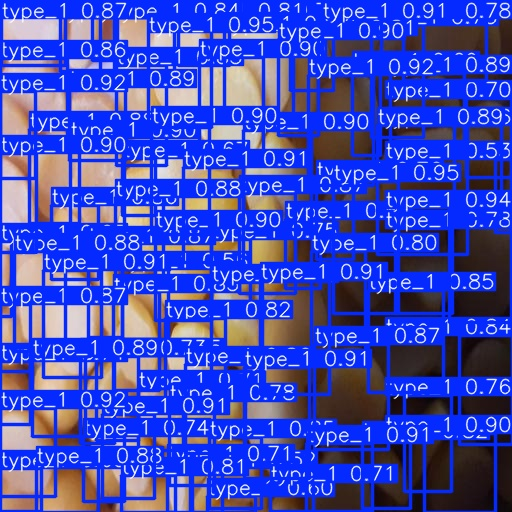

In [25]:
from IPython.display import Image, display

# Show the result image
result_path = "/content/runs/detect/predict/20250326_204417_jpg.rf.f631a7b97dea11cd39cc251b995a00fb.jpg"
display(Image(filename=result_path))


In [26]:
# Evaluate the trained model
metrics_type1 = model_type1.val()
metrics_type2 = model_type2.val()


Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/type_1/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/type_1/valid/images/20250326_210939_jpg.rf.ed4bf8703e7cf93f776c56f325dd89a1.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:25<00:00,  3.71s/it]


                   all        100      18777      0.917      0.408      0.441      0.368
                type_1         99      18599      0.834      0.815      0.882      0.735
                type_2          1        178          1          0          0          0
Speed: 3.2ms preprocess, 8.7ms inference, 0.0ms loss, 18.2ms postprocess per image
Results saved to runs/detect/val
Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/type_2/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:36<00:00,  5.24s/it]


                   all        100      17064      0.835      0.869      0.922       0.77
        type_2_class_1        100      17064      0.835      0.869      0.922       0.77
Speed: 5.8ms preprocess, 5.0ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to runs/detect/val2



image 1/1 /content/type_1/valid/images/20250326_211436_jpg.rf.6b225993037f168769064b133bf5d59e.jpg: 640x640 287 type_1s, 16.3ms
Speed: 8.2ms preprocess, 16.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
🔍 Inference Summary:

🔹 Detected 287 instances of class: 'type_1'
✅ Total Detections: 287

🧾 Feature Summary:
🎨 Mean RGB: (np.int64(131), np.int64(171), np.int64(157))
🏷️  Dominant Color Zone: Greenish
📐 Average Area: 300.49 px
↔️  Average Aspect Ratio: 1.73


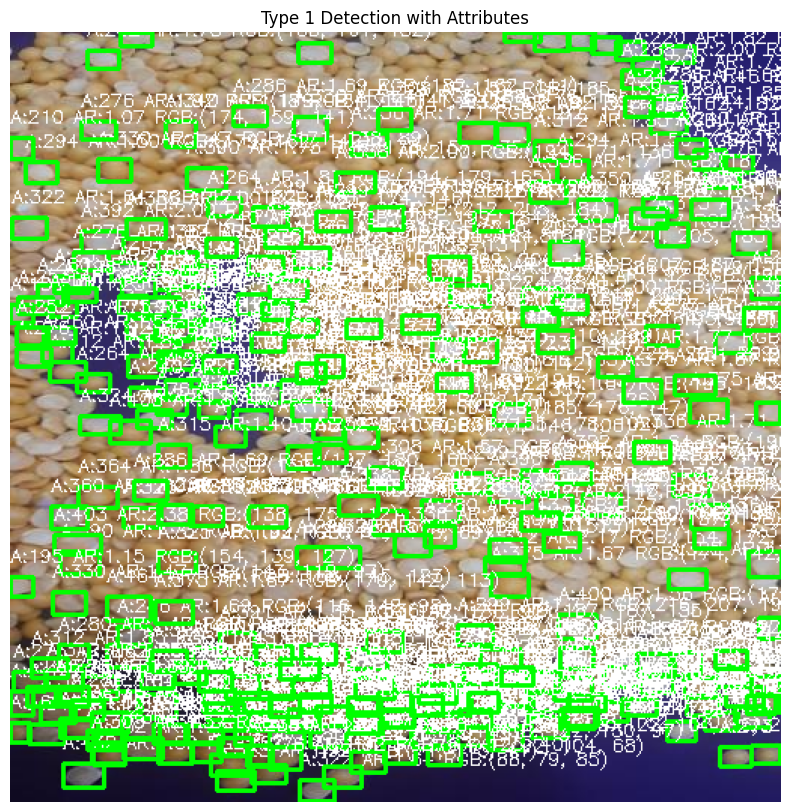

In [31]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Image
image_path = '/content/type_1/valid/images/20250326_211436_jpg.rf.6b225993037f168769064b133bf5d59e.jpg'
results = model.predict(image_path)
image = cv2.imread(image_path)

# Stats containers
areas = []
aspect_ratios = []
avg_colors = []
all_classes = []

print("🔍 Inference Summary:\n")

for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    classes = result.boxes.cls.cpu().numpy().astype(int)

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        roi = image[y1:y2, x1:x2]

        mean_color = cv2.mean(roi)[:3]
        area = (x2 - x1) * (y2 - y1)
        aspect_ratio = (x2 - x1) / (y2 - y1) if (y2 - y1) != 0 else 0

        avg_colors.append(mean_color)
        areas.append(area)
        aspect_ratios.append(aspect_ratio)
        all_classes.append(classes[i])

        # Visualize
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label = f"A:{area} AR:{aspect_ratio:.2f} RGB:{tuple(int(c) for c in mean_color[::-1])}"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1)

# Count class detections
class_counts = Counter(all_classes)
for cls_id, count in class_counts.items():
    print(f"🔹 Detected {count} instances of class: '{model.names[cls_id]}'")
print(f"✅ Total Detections: {len(all_classes)}")

# Convert to NumPy for stats
avg_colors_np = np.array(avg_colors)
mean_rgb = np.mean(avg_colors_np, axis=0).astype(int)
mean_area = np.mean(areas)
mean_ar = np.mean(aspect_ratios)

# Dominant color inference
def get_color_zone(rgb):
    r, g, b = rgb
    if r > g and r > b:
        return "Reddish"
    elif g > r and g > b:
        return "Greenish"
    elif b > r and b > g:
        return "Bluish"
    elif abs(r - g) < 15 and b < r:
        return "Yellowish"
    else:
        return "Neutral"

dominant_zone = get_color_zone(mean_rgb)

# Print Summary
print("\n🧾 Feature Summary:")
print(f"🎨 Mean RGB: {tuple(mean_rgb)}")
print(f"🏷️  Dominant Color Zone: {dominant_zone}")
print(f"📐 Average Area: {mean_area:.2f} px")
print(f"↔️  Average Aspect Ratio: {mean_ar:.2f}")

# Show image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(14, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Type 1 Detection with Attributes")
plt.show()
